In [3]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [25]:
#Load Dataset
df=pd.read_csv(r"C:\Users\User\OneDrive\Data Analysis\Statistics\AB Testing\Marketing AB Testing\marketing_AB.csv")

In [27]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [33]:
#Find duplicates where applicable
df.duplicated(subset='user id').sum()

0

In [53]:
#Check nulls
df.isnull().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [37]:
#Drop unwanted columns
df.drop(['Unnamed: 0','user id'], inplace= True, axis=1)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [84]:
df_categ['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [39]:
#Club category columns into a separate table
df_categ=df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_categ

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14
...,...,...,...,...
588096,ad,False,Tuesday,23
588097,ad,False,Tuesday,23
588098,ad,False,Tuesday,23
588099,ad,False,Tuesday,23


In [51]:
#Check how many unique values does each column have
df_categ.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [59]:
#check what are the unique values
for i in df_categ.columns:
    print(f"{i.upper()} : {df_categ[i].unique()}")

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Univariate Analysis

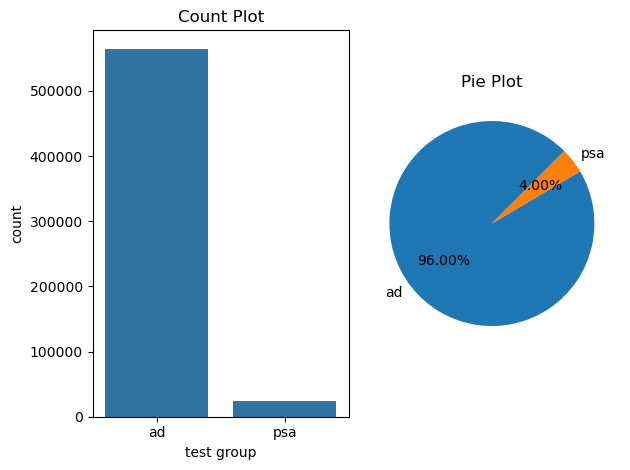

In [104]:
variable=df_categ['test group']

plt.subplot(1,2,1)
sns.countplot(data=df_categ, x=variable)
plt.title("Count Plot")


plt.subplot(1,2,2)
count=variable.value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%", startangle=45)
plt.title("Pie Plot")

plt.tight_layout()
plt.show()

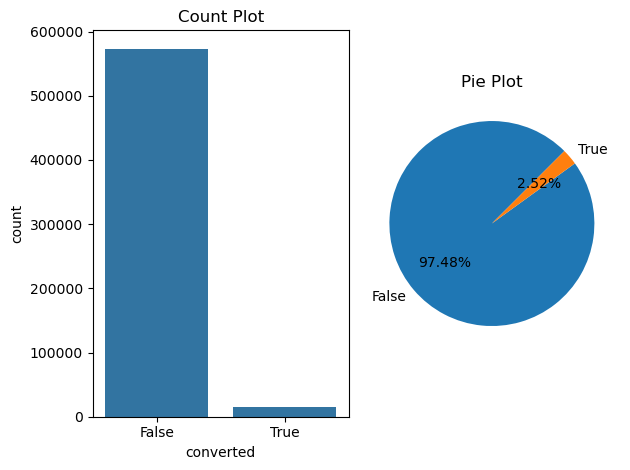

In [114]:
variable=df_categ['converted']

plt.subplot(1,2,1)
sns.countplot(data=df_categ, x=variable)
plt.title("Count Plot")


plt.subplot(1,2,2)
count=variable.value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%", startangle=45)
plt.title("Pie Plot")

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14220\941826180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categ, x=variable, order=variable.value_counts().index, palette='plasma')


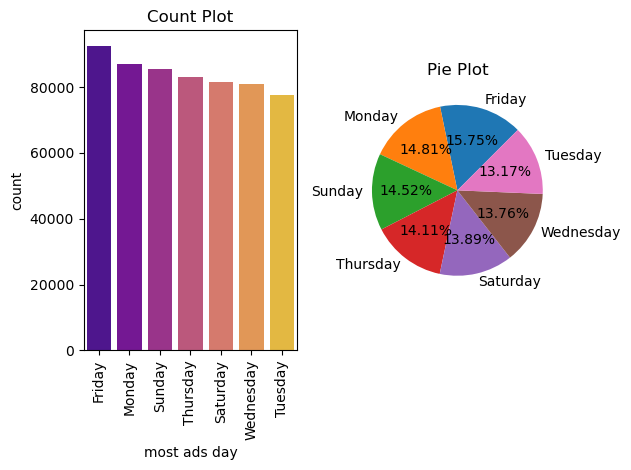

In [151]:
variable=df_categ['most ads day']

plt.subplot(1,2,1)
sns.countplot(data=df_categ, x=variable, order=variable.value_counts().index, palette='plasma')
plt.xticks(rotation=90)
plt.title("Count Plot")


plt.subplot(1,2,2)
count=variable.value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%", startangle=45)
plt.title("Pie Plot")

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14220\278017645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_categ, x=variable, palette='rainbow')


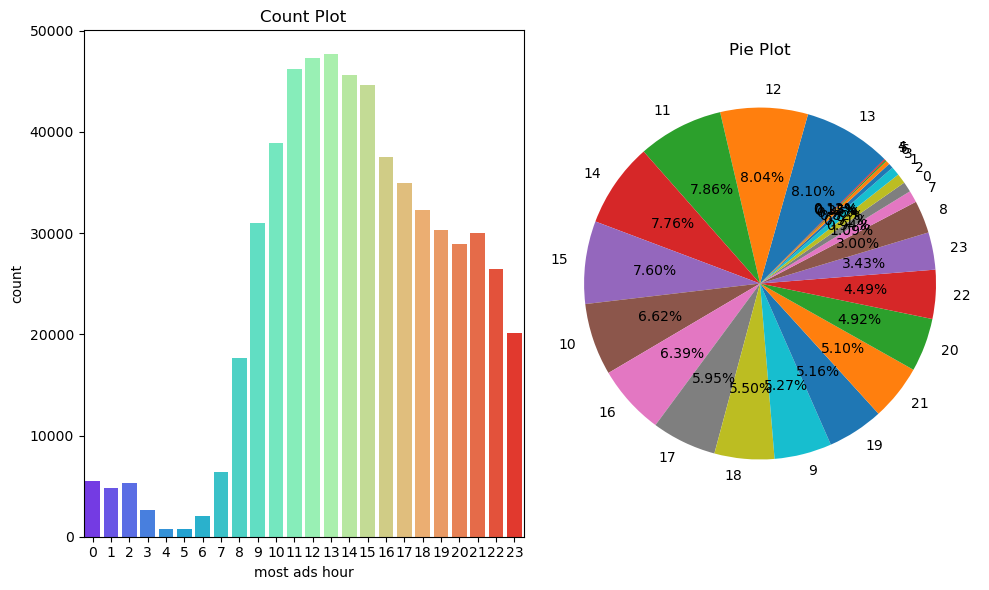

In [147]:
variable=df_categ['most ads hour']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=df_categ, x=variable, palette='rainbow')
plt.title("Count Plot")


plt.subplot(1,2,2)
count=variable.value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%", startangle=45)
plt.title("Pie Plot")

plt.tight_layout()
plt.show()

In [173]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [175]:
#75% value is around 30. so we can assume that most ads shown are arond 30 so we are taking the values less than 50

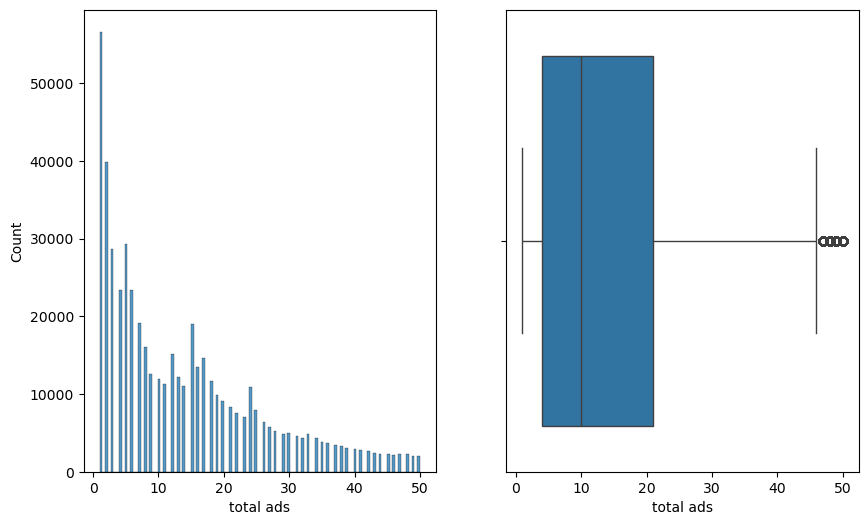

In [169]:
variable=df[df['total ads']<=50]['total ads']

#Histogram
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

sns.histplot(data=df, x=variable)

plt.subplot(1,2,2)
sns.boxplot(data=df, x=variable)
plt.show()

In [180]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


Bivariate Analysis

In [204]:
cnv_test_gp=pd.crosstab(index=df['test group'],columns=df['converted'],normalize='index')
cnv_test_gp


converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


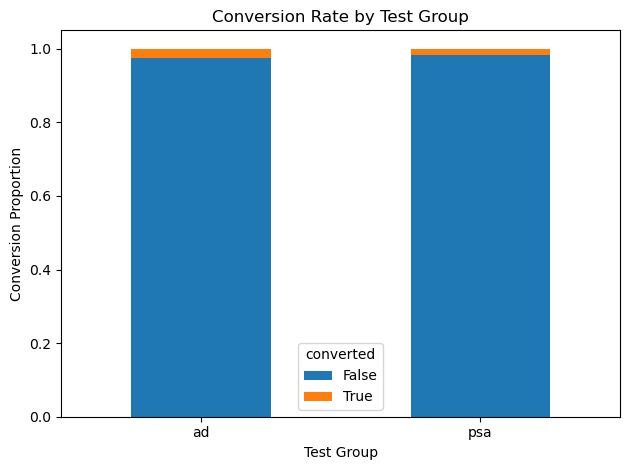

In [218]:
cnv_test_gp.plot(kind='bar', stacked=True)
plt.title("Conversion Rate by Test Group")
plt.xlabel("Test Group")
plt.ylabel("Conversion Proportion")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [236]:
cnv_most_ad=pd.crosstab(index=df['most ads day'],columns=df['converted'],normalize='index')
cnv_most_ad.sort_values(by=True,ascending=False)


converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


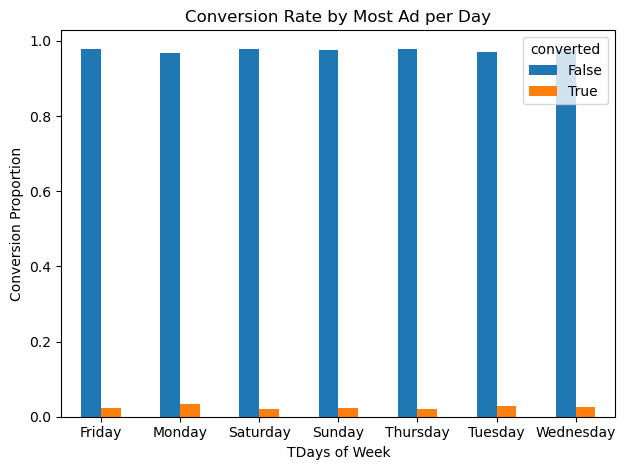

In [230]:
cnv_most_ad.plot(kind='bar', stacked=False)
plt.title("Conversion Rate by Most Ad per Day")
plt.xlabel("TDays of Week")
plt.ylabel("Conversion Proportion")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [240]:
cnv_most_hour=pd.crosstab(index=df['most ads hour'],columns=df['converted'],normalize='index')
cnv_most_hour.sort_values(by=True,ascending=False)


converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


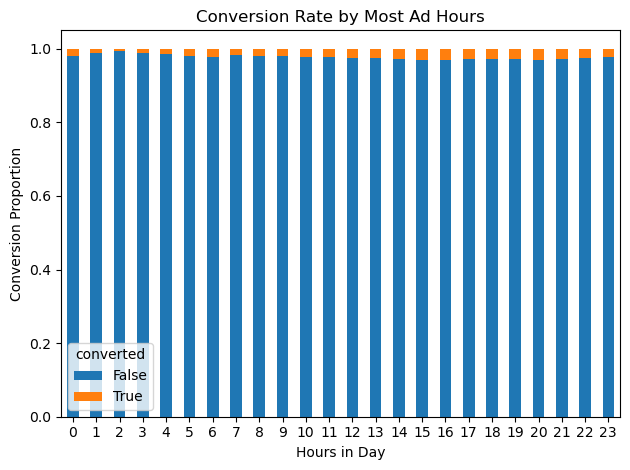

In [244]:
cnv_most_hour.plot(kind='bar', stacked=True)
plt.title("Conversion Rate by Most Ad Hours")
plt.xlabel("Hours in Day")
plt.ylabel("Conversion Proportion")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

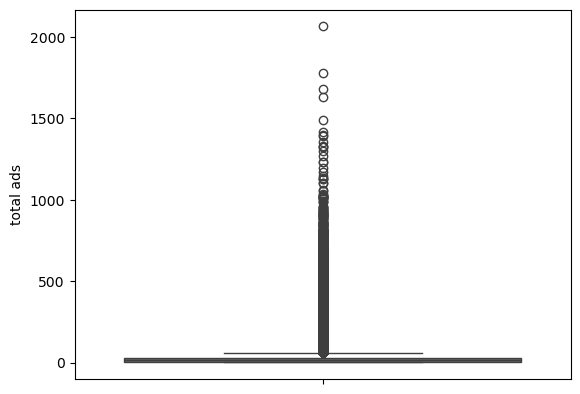

In [262]:
sns.boxplot(data=df,y=df['total ads'])
plt.show()

In [ ]:
#From below graph we can conclude that people who purchased saw around 30 median no ads

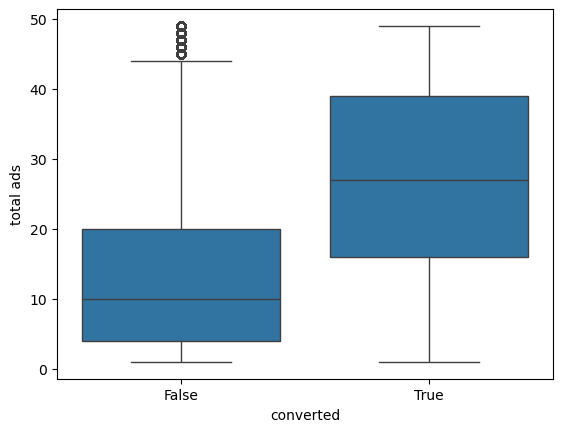

In [260]:
sns.boxplot(y='total ads',data=df[df['total ads']<50], x='converted')
plt.show()

In [291]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [288]:
import scipy.stats as stats
alpha=0.5
for i in df_categ.columns:
    if i != 'converted':
        contingency_table=pd.crosstab(index=df['converted'], columns=df_categ[i],)

        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        print(f"\nBetween {i} & Converted")
        print(f"Chi square value is {chi2}")
        print(f"p-value is {p}")

        if(alpha<0.5):
            print("We reject Null Hypothesis. There is significant differnce between conversion rates netween ad and psa")
        else:
            print("We fail to reject null hypothesis. There is no difference between conversion rates netween ad and psa")



Between test group & Converted
Chi square value is 54.005823883685245
p-value is 1.9989623063390075e-13
We fail to reject null hypothesis. There is no difference between conversion rates netween ad and psa

Between most ads day & Converted
Chi square value is 410.0478857936585
p-value is 1.932184379244731e-85
We fail to reject null hypothesis. There is no difference between conversion rates netween ad and psa

Between most ads hour & Converted
Chi square value is 430.76869230822086
p-value is 8.027629823696771e-77
We fail to reject null hypothesis. There is no difference between conversion rates netween ad and psa


Now we are going to check for the numerical column i.e. total ads. First we will be checking if the values are normal in nature using Shapiro_Wilk Test. Then based on that we will decide the accurate test

In [295]:
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


Shapiro-Wilk Test (Normality Test):
For both groups (True and False):

H₀ (Null Hypothesis): The data is normally distributed.

H₁ (Alternative Hypothesis): The data is not normally distributed.

In [301]:
import scipy.stats as stat

df_ads_true=df[df['converted']==True]['total ads']
df_ads_false=df[df['converted']==False]['total ads']

shapiro_stat_t, shapiro_p_t = stats.shapiro(df_ads_true)
shapiro_stat_f, shapiro_p_f = stats.shapiro(df_ads_false)

print(f"For Converted=true, the test stat is {shapiro_stat_t} & p value is {shapiro_p_t}")
print(f"For Converted=false, the test stat is {shapiro_stat_f} & p value is {shapiro_p_f}")


For Converted=true, the test stat is 0.6578396248200824 & p value is 1.638680987007771e-98
For Converted=false, the test stat is 0.47467424889275545 & p value is 9.883049430735801e-204


In [309]:
levene_stat, levene_p=stat.levene(df_ads_true,df_ads_false)
print(f"Leven test p-value is {levene_p}")

Leven test p-value is 0.0


So the variances of the two groups are significantly different from levene's test and both the p-values are close to 0 or we may say '0'. so variances are different and both converted and non-converted groups are not normal

Now lets perform the suitable test

Independent Two-Sample t-Test (Parametric Test):

H₀: The distributions (or means) of the number of ads shown are EQUAL\ for the two groups (converted vs. not converted).

H₁: The distributions (or means) of the number of ads shown are NOT EQUAL for the two groups (converted vs. not converted).

Mann-Whitney U Test (Non-parametric Test):

H₀ (Null Hypothesis): The distributions (or medians) of the number of ads shown are equal for the two groups (converted vs. not converted).

H₁ (Alternative Hypothesis):The distributions (or medians) of the number of ads shown are not equal for the two groups.


In [316]:
alpha=0.05

if(shapiro_p_t>alpha and shapiro_p_f>alpha and levene_p>alpha):
    t_stat,t_p_value=stat.ttest_ind(df_ads_true,df_ads_false)
    print(f"Independent 2-sample t test p-value is {t_p_value}")

else:
    mw_stat,mw_p_value=stat.mannwhitneyu(df_ads_true,df_ads_false)
    print(f"Mann_whitney 2-sample test p-value is {mw_p_value}")

Mann_whitney 2-sample test p-value is 0.0


Hence we are rejecting null hypothesis, the distributions are quite different. Hence the AB testing activity was successful and we can continue with the changes